In [38]:
import pandas as pd

# Define custom function to convert assets and liabilities
def convert_to_lakhs(value):
    if value == "0":  # Handle cases where value is '0'
        return 0
    number, unit = value.split()
    number = float(number.replace(",", ""))  # Remove comma from numbers
    if unit == 'Crore+':
        return (int)(number*100)
    elif unit == 'Lac+':
        return (int)(number)  # Convert Lac+ to Crores
    else:
        return float('NaN')  # Handle invalid cases

# Read the dataset
data = pd.read_csv("train.csv")

# Convert "Total Assets" and "Liabilities" columns to number in Crores
data["Total Assets"] = data["Total Assets"].apply(convert_to_lakhs)
data["Liabilities"] = data["Liabilities"].apply(convert_to_lakhs)



In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the column using LabelEncoder
encoded_column = label_encoder.fit_transform(data['Education'])

data['Education'] = encoded_column

# Select categorical columns for embedding
categorical_columns = ["Candidate", "Constituency ∇", "Party", "state"]

# Perform one-hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[categorical_columns])

# Reduce dimensionality using PCA
pca = PCA(n_components=4)  # Adjust the number of components as needed
embedding = pca.fit_transform(encoded_data.toarray())

# Add the embeddings back to the dataset
embedding_df = pd.DataFrame(embedding, columns=[f"{column}_embedding_{i+1}" for i, column in enumerate(categorical_columns)])
data_with_embedding = pd.concat([data, embedding_df], axis=1)

# Drop the original categorical columns if needed
data_with_embedding.drop(columns=categorical_columns, inplace=True)

# Print the dataset with embeddings
print(data_with_embedding)


        ID  Criminal Case  Total Assets  Liabilities  Education  \
0        0              4       21100.0        200.0          3   
1        1              0         100.0          0.0          1   
2        2              0         700.0         22.0          9   
3        3              0         900.0         24.0          9   
4        4              2         200.0         61.0          3   
...    ...            ...           ...          ...        ...   
2054  2054              1          61.0         10.0          6   
2055  2055              0         200.0          8.0          0   
2056  2056              0        1300.0         85.0          5   
2057  2057              1        2500.0         94.0          1   
2058  2058              0          11.0          0.0          5   

      Candidate_embedding_1  Constituency ∇_embedding_2  Party_embedding_3  \
0                  0.406400                    0.310450          -0.476432   
1                 -0.644126            

In [40]:
data_with_embedding.drop(columns=['ID'], inplace=True)
data_without_id = data_with_embedding
data_without_id

,Criminal Case,Total Assets,Liabilities,Education,Candidate_embedding_1,Constituency ∇_embedding_2,Party_embedding_3,state_embedding_4
0,4,21100.0,200.0,3,0.406400,0.310450,-0.476432,-0.256177
1,0,100.0,0.0,1,-0.644126,-0.206810,0.192644,-0.250262
2,0,700.0,22.0,9,0.778389,-0.750674,0.299949,0.205058
3,0,900.0,24.0,9,-0.578171,-0.040019,0.008699,-0.239442
4,2,200.0,61.0,3,-0.528794,0.375375,0.624891,0.021813
...,...,...,...,...,...,...,...,...
2054,1,61.0,10.0,6,0.318661,0.171626,-0.178758,-0.065703
2055,0,200.0,8.0,0,0.674872,-0.621277,0.237320,0.100773
2056,0,1300.0,85.0,5,-0.766007,-0.052040,-0.252263,0.687867
2057,1,2500.0,94.0,1,0.311347,0.148433,-0.221265,-0.263269


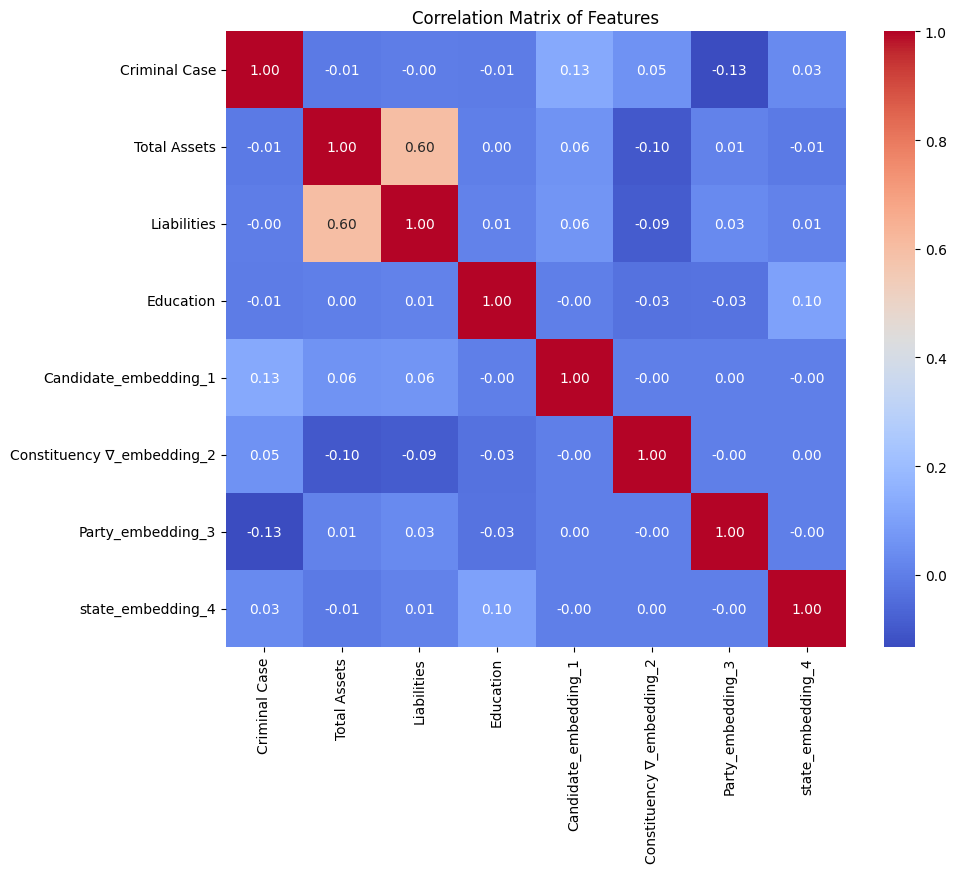

In [41]:
import pandas as pd

# Assuming 'df' is your dataframe containing the features
# Compute the correlation matrix
correlation_matrix = data_without_id.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Generate heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [42]:
data_with_embedding.drop(columns=['Liabilities'], inplace=True)
data_with_embedding

,Criminal Case,Total Assets,Education,Candidate_embedding_1,Constituency ∇_embedding_2,Party_embedding_3,state_embedding_4
0,4,21100.0,3,0.406400,0.310450,-0.476432,-0.256177
1,0,100.0,1,-0.644126,-0.206810,0.192644,-0.250262
2,0,700.0,9,0.778389,-0.750674,0.299949,0.205058
3,0,900.0,9,-0.578171,-0.040019,0.008699,-0.239442
4,2,200.0,3,-0.528794,0.375375,0.624891,0.021813
...,...,...,...,...,...,...,...
2054,1,61.0,6,0.318661,0.171626,-0.178758,-0.065703
2055,0,200.0,0,0.674872,-0.621277,0.237320,0.100773
2056,0,1300.0,5,-0.766007,-0.052040,-0.252263,0.687867
2057,1,2500.0,1,0.311347,0.148433,-0.221265,-0.263269


In [43]:
y = data_with_embedding["Education"]
y

0       3
1       1
2       9
3       9
4       3
       ..
2054    6
2055    0
2056    5
2057    1
2058    5
Name: Education, Length: 2059, dtype: int64

In [44]:
X = data_with_embedding
X.drop(columns = ['Education'],inplace = True)
X

,Criminal Case,Total Assets,Candidate_embedding_1,Constituency ∇_embedding_2,Party_embedding_3,state_embedding_4
0,4,21100.0,0.406400,0.310450,-0.476432,-0.256177
1,0,100.0,-0.644126,-0.206810,0.192644,-0.250262
2,0,700.0,0.778389,-0.750674,0.299949,0.205058
3,0,900.0,-0.578171,-0.040019,0.008699,-0.239442
4,2,200.0,-0.528794,0.375375,0.624891,0.021813
...,...,...,...,...,...,...
2054,1,61.0,0.318661,0.171626,-0.178758,-0.065703
2055,0,200.0,0.674872,-0.621277,0.237320,0.100773
2056,0,1300.0,-0.766007,-0.052040,-0.252263,0.687867
2057,1,2500.0,0.311347,0.148433,-0.221265,-0.263269


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier()

from sklearn.impute import SimpleImputer

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.fit_transform(X_test)

# Step 4: Train the Model
clf.fit(X_imputed, y)

# Step 5: Predictions
y_pred = clf.predict(X_test_imputed)

# Step 6: Evaluate the Model
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.8119035465957218
